In [1]:
#Gina's portion of the first part of the midterm project

In [2]:
#merging rent burden, age, and rental vacancy and mapping out their correlation, with a focus on the areas affected by 2025 fires

In [4]:
#importing libraries

In [5]:
import pandas as pd

In [6]:
import geopandas as gpd

In [7]:
import os

In [8]:
import matplotlib.pyplot as plt

In [9]:
#importing ACS data - for some reason I consistently get an error without the os line of code

In [10]:
os.path.join(os.getcwd(), 'census_age_vacancy.csv')

'/home/jovyan/UP221_2025Fire_HousingBurden/Assignments/census_age_vacancy.csv'

In [11]:
census = pd.read_csv(
    'census_age_vacancy.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_State':str,
        'Geo_County':str
    }
)

In [12]:
census.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,...,PCT_SE_A01001_011,PCT_SE_A01001_012,PCT_SE_A01001_013,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,PCT_SE_A10047_002,PCT_SE_A10047_003,PCT_SE_A10047_004
0,6037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,6,...,10.04,5.11,1.82,174,19,0,155,10.92,0.00,89.08
1,6037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,6,...,12.25,6.43,1.29,84,0,25,59,0.00,29.76,70.24
2,6037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,6,...,6.18,2.85,0.80,95,30,0,65,31.58,0.00,68.42
3,6037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3874,6,...,8.27,6.13,1.70,27,0,0,27,0.00,0.00,100.00
4,6037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3875,6,...,11.38,7.00,5.82,156,26,54,76,16.67,34.62,48.72


In [13]:
census['Geo_FIPS']='0'+census['Geo_FIPS'].astype(str)

In [14]:
census.head()

,Geo_FIPS,Geo_GEOID,Geo_NAME,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_FILEID,Geo_LOGRECNO,Geo_STATE,...,PCT_SE_A01001_011,PCT_SE_A01001_012,PCT_SE_A01001_013,SE_A10047_001,SE_A10047_002,SE_A10047_003,SE_A10047_004,PCT_SE_A10047_002,PCT_SE_A10047_003,PCT_SE_A10047_004
0,06037101110,14000US06037101110,Census Tract 1011.10,"Census Tract 1011.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3871,6,...,10.04,5.11,1.82,174,19,0,155,10.92,0.00,89.08
1,06037101122,14000US06037101122,Census Tract 1011.22,"Census Tract 1011.22, Los Angeles County, Cali...",ca,140,0,ACSSF,3872,6,...,12.25,6.43,1.29,84,0,25,59,0.00,29.76,70.24
2,06037101210,14000US06037101210,Census Tract 1012.10,"Census Tract 1012.10, Los Angeles County, Cali...",ca,140,0,ACSSF,3873,6,...,6.18,2.85,0.80,95,30,0,65,31.58,0.00,68.42
3,06037101220,14000US06037101220,Census Tract 1012.20,"Census Tract 1012.20, Los Angeles County, Cali...",ca,140,0,ACSSF,3874,6,...,8.27,6.13,1.70,27,0,0,27,0.00,0.00,100.00
4,06037101300,14000US06037101300,Census Tract 1013,"Census Tract 1013, Los Angeles County, California",ca,140,0,ACSSF,3875,6,...,11.38,7.00,5.82,156,26,54,76,16.67,34.62,48.72


In [15]:
#fixed the leading zero

In [16]:
columns = list(census)

In [17]:
columns

['Geo_FIPS',
 'Geo_GEOID',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_A01001_001',
 'SE_A01001_002',
 'SE_A01001_003',
 'SE_A01001_004',
 'SE_A01001_005',
 'SE_A01001_006',
 'SE_A01001_007',
 'SE_A01001_008',
 'SE_A01001_009',
 'SE_A01001_010',
 'SE_A01001_011',
 'SE_A01001_012',
 'SE_A01001_013',
 'PCT_SE_A01001_002',
 'PCT_SE_A01001_003',
 'PCT_SE_A01001_004',
 'PCT_SE_A01001_005',
 'PCT_SE_A01001_006',
 'PCT_SE_A01001_007',
 'PCT_SE_A01001_008',
 'PCT_SE_A01001_009',
 'PCT_SE_A01001_010',
 'PCT_SE_A01001_011',
 'PCT_SE_A01001_012',
 'PCT_SE_A01001_013',
 'SE_A10047_001',
 'SE_A10047_002',
 'SE_A10047_003',
 'SE_A10047_004',
 'PCT_SE_A10047_002',
 'PCT_SE_A10047_003',
 'PCT_SE_A10047_004']

In [18]:
#before renaming the columns, I'm going to sum the age buckets to under 18, 18-55, and over 55

In [19]:
census['Under 18'] = census[['SE_A01001_002','SE_A01001_003','SE_A01001_004','SE_A01001_005']].sum(axis=1)

In [20]:
census['18 to 54'] = census[['SE_A01001_006','SE_A01001_007','SE_A01001_008','SE_A01001_009']].sum(axis=1)

In [21]:
census['55 and Over'] = census[['SE_A01001_010','SE_A01001_011','SE_A01001_012','SE_A01001_013']].sum(axis=1)

In [22]:
list(census)

['Geo_FIPS',
 'Geo_GEOID',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'SE_A01001_001',
 'SE_A01001_002',
 'SE_A01001_003',
 'SE_A01001_004',
 'SE_A01001_005',
 'SE_A01001_006',
 'SE_A01001_007',
 'SE_A01001_008',
 'SE_A01001_009',
 'SE_A01001_010',
 'SE_A01001_011',
 'SE_A01001_012',
 'SE_A01001_013',
 'PCT_SE_A01001_002',
 'PCT_SE_A01001_003',
 'PCT_SE_A01001_004',
 'PCT_SE_A01001_005',
 'PCT_SE_A01001_006',
 'PCT_SE_A01001_007',
 'PCT_SE_A01001_008',
 'PCT_SE_A01001_009',
 'PCT_SE_A01001_010',
 'PCT_SE_A01001_011',
 'PCT_SE_A01001_012',
 'PCT_SE_A01001_013',
 'SE_A10047_001',
 'SE_A10047_002',
 'SE_A10047_003',
 'SE_A10047_004',
 'PCT_SE_A10047_002',
 'PCT_SE_A10047_003',
 'PCT_SE_A10047_004',
 'Under 18',
 '18 to 54',
 '55 and Over']

In [23]:
census.columns = ['FIPS',
 'Geo_GEOID',
 'Geo_NAME',
 'Geo_QName',
 'Geo_STUSAB',
 'Geo_SUMLEV',
 'Geo_GEOCOMP',
 'Geo_FILEID',
 'Geo_LOGRECNO',
 'Geo_STATE',
 'Geo_COUNTY',
 'Geo_TRACT',
 'Total Population',
 'SE_A01001_002',
 'SE_A01001_003',
 'SE_A01001_004',
 'SE_A01001_005',
 'SE_A01001_006',
 'SE_A01001_007',
 'SE_A01001_008',
 'SE_A01001_009',
 'SE_A01001_010',
 'SE_A01001_011',
 'SE_A01001_012',
 'SE_A01001_013',
 'PCT_SE_A01001_002',
 'PCT_SE_A01001_003',
 'PCT_SE_A01001_004',
 'PCT_SE_A01001_005',
 'PCT_SE_A01001_006',
 'PCT_SE_A01001_007',
 'PCT_SE_A01001_008',
 'PCT_SE_A01001_009',
 'PCT_SE_A01001_010',
 'PCT_SE_A01001_011',
 'PCT_SE_A01001_012',
 'PCT_SE_A01001_013',
 'Vacant Housing Units',
 'For Rent',
 'For Sale',
 'Other Vacant',
 'Percent for Rent',
 'Percent for Sale',
 'Percent Other',
 'Under 18',
 '18 to 54',
 '55 and Over']

In [24]:
#renamed the columns I'm interested in

In [25]:
columns_to_keep = ['FIPS','Total Population','Under 18',
                '18 to 54',
                 '55 and Over',
                   'Vacant Housing Units',
                   'For Rent',
                     'For Sale',
                     'Other Vacant',
                     'Percent for Rent',
                     'Percent for Sale',
                     'Percent Other']

In [26]:
df2 = census[columns_to_keep]

In [27]:
df2.head()

,FIPS,Total Population,Under 18,18 to 54,55 and Over,Vacant Housing Units,For Rent,For Sale,Other Vacant,Percent for Rent,Percent for Sale,Percent Other
0,06037101110,4283,874,2078,1331,174,19,0,155,10.92,0.00,89.08
1,06037101122,3405,429,1603,1373,84,0,25,59,0.00,29.76,70.24
2,06037101210,6347,1480,3462,1405,95,30,0,65,31.58,0.00,68.42
3,06037101220,3702,751,1766,1185,27,0,0,27,0.00,0.00,100.00
4,06037101300,3884,439,1625,1820,156,26,54,76,16.67,34.62,48.72


In [28]:
#df2 is now going to be merged to the 'housing burden' index from CalEnviroScreen

In [29]:
ces = pd.read_csv('/home/jovyan/UP221_2025Fire_HousingBurden/Assignments/CES_housing.csv')

In [30]:
ces['FIPS']= '0' + ces['Census Tract'].astype(str)

In [31]:
ces.head()

,Census Tract,Total Population,Housing Burden,Housing Burden Pctl,FIPS
0,6019001100,2780,30.3,91.04,06019001100
1,6077000700,4680,31.2,92.28,06077000700
2,6037204920,2751,20.3,63.97,06037204920
3,6019000700,3664,35.4,96.41,06019000700
4,6019000200,2689,32.7,94.16,06019000200


In [32]:
#added the leading zero, now to merge it with the other csv

In [33]:
df3=df2.merge(ces,on="FIPS")

In [34]:
df3.head()

,FIPS,Total Population_x,Under 18,18 to 54,55 and Over,Vacant Housing Units,For Rent,For Sale,Other Vacant,Percent for Rent,Percent for Sale,Percent Other,Census Tract,Total Population_y,Housing Burden,Housing Burden Pctl
0,06037101110,4283,874,2078,1331,174,19,0,155,10.92,0.00,89.08,6037101110,4283,32.5,93.89
1,06037101122,3405,429,1603,1373,84,0,25,59,0.00,29.76,70.24,6037101122,3405,14.8,37.48
2,06037101210,6347,1480,3462,1405,95,30,0,65,31.58,0.00,68.42,6037101210,6347,31.5,92.64
3,06037101220,3702,751,1766,1185,27,0,0,27,0.00,0.00,100.00,6037101220,3702,33.9,95.25
4,06037101300,3884,439,1625,1820,156,26,54,76,16.67,34.62,48.72,6037101300,3884,18.6,56.86


In [35]:
#the two data frames are now merged, time to add a geoJSON

In [36]:
os.path.join(os.getcwd(), '2020_Census_Tracts.geojson')

'/home/jovyan/UP221_2025Fire_HousingBurden/Assignments/2020_Census_Tracts.geojson'

In [37]:
tracts = gpd.read_file('/home/jovyan/UP221_2025Fire_HousingBurden/Assignments/2020_Census_Tracts.geojson')

In [38]:
tracts['FIPS'] = '06' +'037'+tracts['CT20']

In [39]:
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.2559, -118.28697 34.25...",06037101222


In [40]:
df4 = tracts.merge(df3,on='FIPS')

In [41]:
df4.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,FIPS,Total Population_x,Under 18,18 to 54,...,For Rent,For Sale,Other Vacant,Percent for Rent,Percent for Sale,Percent Other,Census Tract,Total Population_y,Housing Burden,Housing Burden Pctl
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2...",06037101110,4283,874,2078,...,19,0,155,10.92,0.00,89.08,6037101110,4283,32.5,93.89
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2...",06037101122,3405,429,1603,...,0,25,59,0.00,29.76,70.24,6037101122,3405,14.8,37.48
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2...",06037101220,3702,751,1766,...,0,0,27,0.00,0.00,100.00,6037101220,3702,33.9,95.25
3,4997,101300,1013.00,2.777377e+07,29384.860602,"POLYGON ((-118.26528 34.25238, -118.26539 34.2...",06037101300,3884,439,1625,...,26,54,76,16.67,34.62,48.72,6037101300,3884,18.6,56.86
4,4998,101400,1014.00,6.791532e+07,42668.928986,"POLYGON ((-118.29946 34.25598, -118.30027 34.2...",06037101400,3458,515,1704,...,0,0,229,0.00,0.00,100.00,6037101400,3458,17.8,53.12


In [42]:
#added the leading zero and merged the datasets

<Axes: xlabel='Under 18', ylabel='Housing Burden Pctl'>

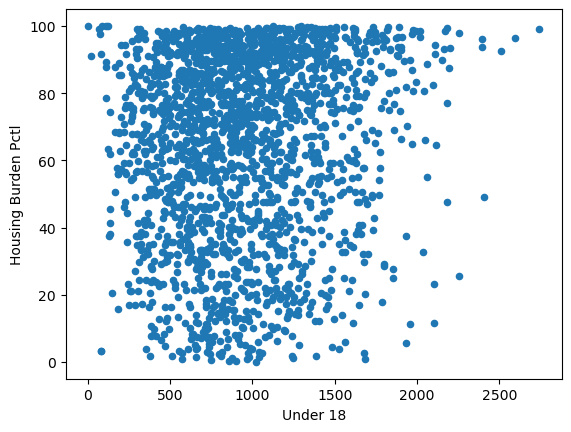

In [44]:
df4.plot.scatter(x="Under 18",y="Housing Burden Pctl")

In [42]:
#This shows the correlation between persons under 18 and their housing burden

<Axes: xlabel='55 and Over', ylabel='Housing Burden Pctl'>

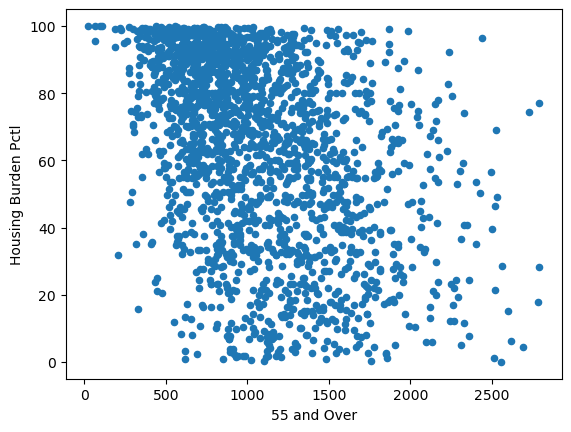

In [43]:
df4.plot.scatter(x="55 and Over",y="Housing Burden Pctl")

In [44]:
#this measures the housing burden of people 55 and over. Children face higher levels of housing burdens than elerly

<Axes: xlabel='18 to 54', ylabel='Housing Burden Pctl'>

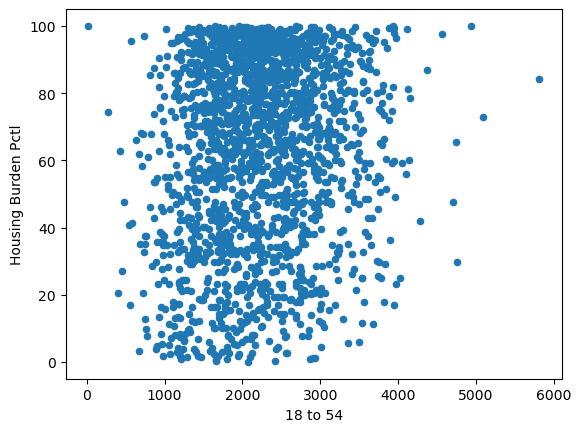

In [45]:
df4.plot.scatter(x="18 to 54",y="Housing Burden Pctl")

In [46]:
#as expected, this one has no skew, aside from more people facing housing burdens

<Axes: xlabel='Vacant Housing Units', ylabel='Housing Burden'>

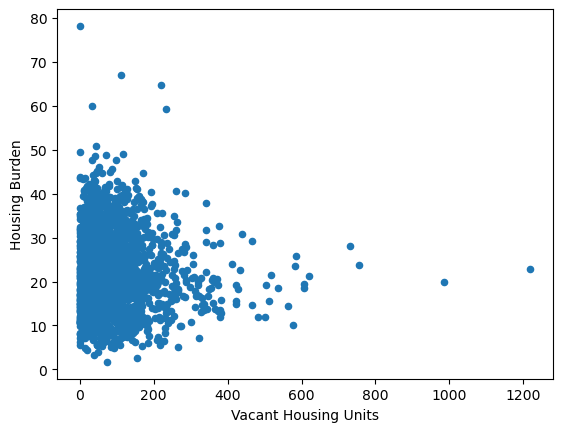

In [47]:
df4.plot.scatter(x="Vacant Housing Units",y="Housing Burden")

<Axes: >

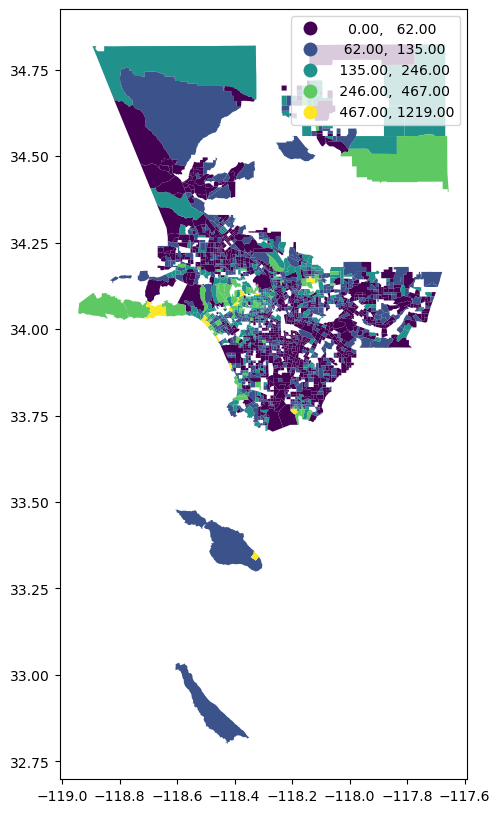

In [48]:
df4.plot(column='Vacant Housing Units', figsize=(12,10), legend=True, scheme='NaturalBreaks')

<Axes: title={'center': 'Housing Burden Pctl'}, xlabel='Under 18'>

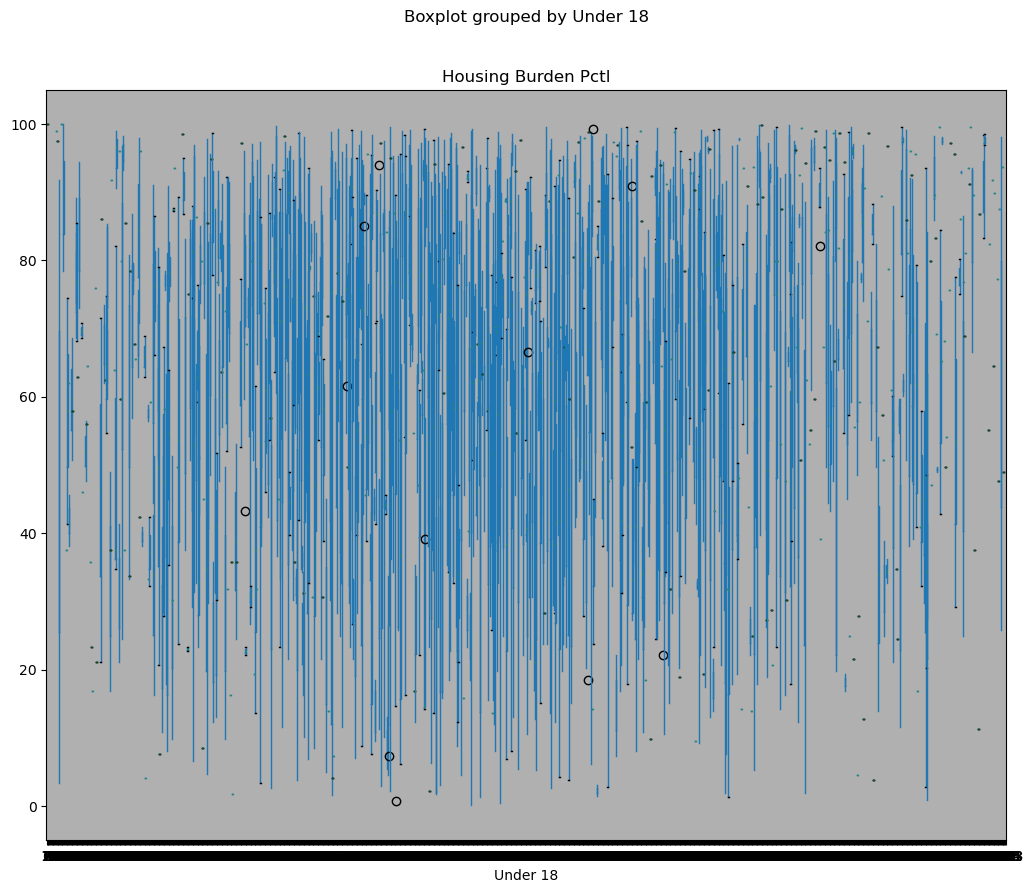

In [51]:
df4.boxplot(column='Housing Burden Pctl', by='Under 18', figsize=(12,10))

<Axes: >

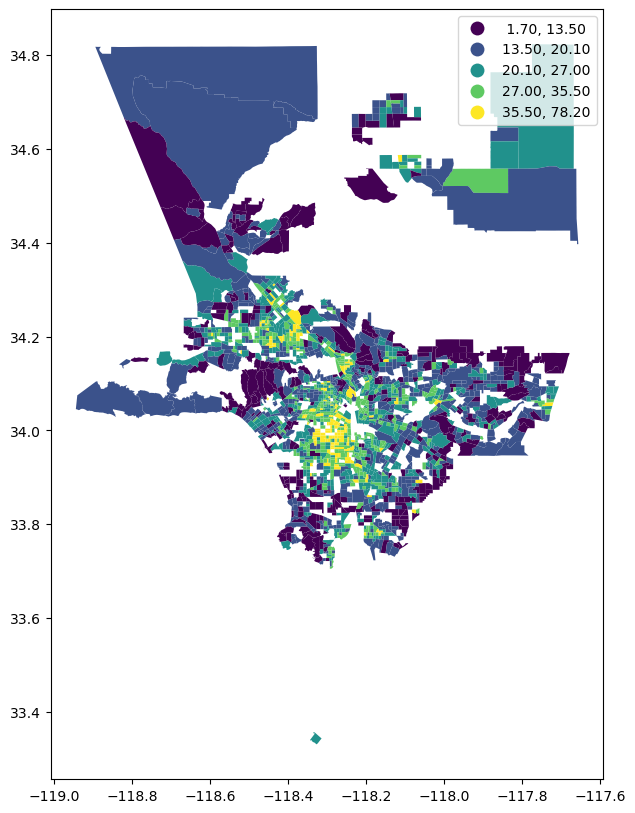

In [52]:
df4.plot(column='Housing Burden', figsize=(12,10), legend=True, scheme='NaturalBreaks')

In [54]:
df4.columns.values

array(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength',
       'geometry', 'FIPS', 'Total Population_x', 'Under 18', '18 to 54',
       '55 and Over', 'Vacant Housing Units', 'For Rent', 'For Sale',
       'Other Vacant', 'Percent for Rent', 'Percent for Sale',
       'Percent Other', 'Census Tract', 'Total Population_y',
       'Housing Burden', 'Housing Burden Pctl'], dtype=object)

<Axes: >

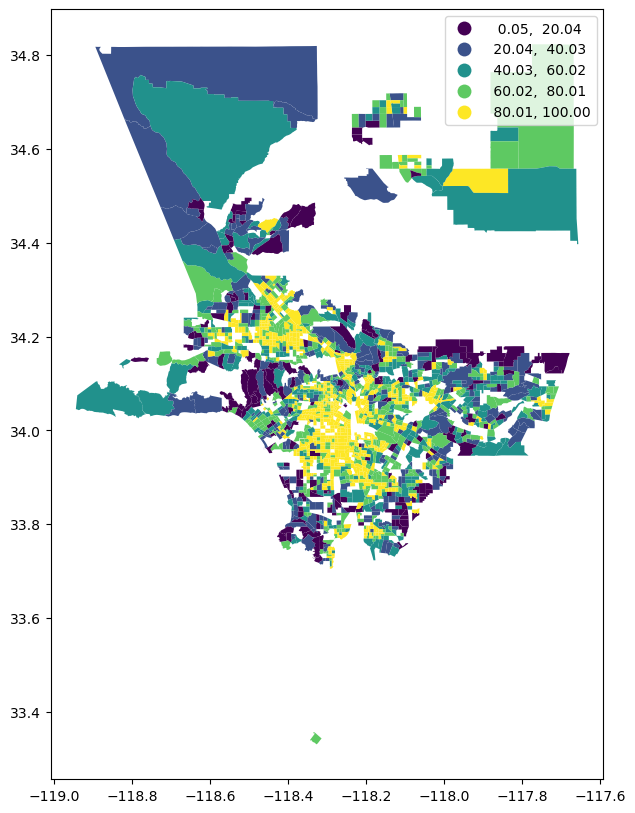

In [55]:
df4.plot(column='Housing Burden Pctl', figsize=(12,10), legend=True, scheme='equal_interval')